In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parse data, define m and n values

points = np.genfromtxt('ex2data2.txt', delimiter = ',')
m, n = points.shape

x = np.array(points[:, :-1])
y = np.array(points[:, -1:])

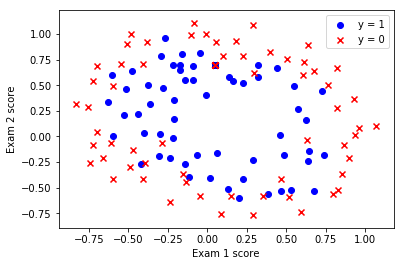

In [3]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['y = 1', 'y = 0'])

plt.show()

In [4]:
# def featureNormalize(X):
#     mu = np.mean(X)
#     sigma = np.std(X)
#     X_norm = (X - mu)/sigma
#     return X_norm , mu , sigma

# x, mean, std = featureNormalize(x)

In [5]:
def mapfeature(X1, X2):
    m = X1.shape[0]
    X_new = np.ones((m,1))
    degree = 6
    for i in range(1,degree+1):
        for j in range(0,i+1):
            X_new = np.hstack((X_new, np.multiply(np.power(X1, i-j), np.power(X2,j)).reshape((m,1))))
    return X_new

X = mapfeature(x[:,0], x[:,1])


In [6]:
theta = np.zeros((X.shape[1],1))

#Hyperparameters
iterations = 800
alpha = 0.2
lam = 2

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [8]:
def gradient(x, y, theta, lam):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    # (X' * (sigmoid(X*theta) - y))./m + [0; theta(2:m_theta).*(lambda/m)];
    reg = np.vstack((0, theta[1:theta.shape[0]] * lam/m))
    grad = ((x.T).dot(h-y))/m + reg
    return grad

In [9]:
def cost(x, y, theta, lam):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    
#J = (-y' * log(sigmoid(X*theta)) - (1 - y)' * log(1 - sigmoid(X*theta)))./m + [theta(2:m_theta)' * theta(2:m_theta)] .* (lambda/(2*m));
    reg = np.dot(theta.T,theta) * lam /(2*m)
    J = ((np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h))) /m).flatten() + reg
    # Calling the gradient within the cost function makes it easier for gradient descent to run
    grad = gradient(x, y, theta, lam)
    return J, grad

J, g = cost(X,y,theta,lam)


In [10]:
def gradient_descent(X,y, theta, alpha, iterations, lam):
    J_hist = []
    for i in range(iterations):
        J, grad = cost(X, y, theta, lam)
        theta = theta - (alpha * grad)
        J_hist.append(J)
    return theta, J_hist

theta, J_hist = gradient_descent(X, y, theta, alpha, iterations, lam)


In [11]:
np.array((J_hist)).flatten().shape

(800,)

In [12]:
def predict(x, theta):
    m, _ = x.shape
    p = np.zeros((m,1))
    h = sigmoid(np.dot(x,theta))
    for i in range(0, h.shape[0]):
        if h[i] >= 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
    return p

pred = predict(X, theta)
print ('Train Accuracy: %f' % ((y[np.where(pred == y)].size / y.size) * 100))

Train Accuracy: 83.050847


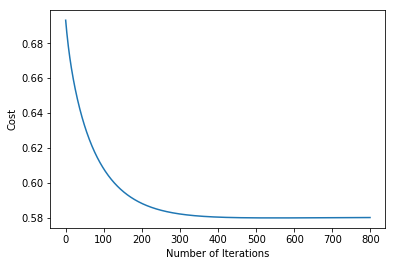

In [13]:
# print(np.asarray(J_hist).shape)
J_hist = np.array((J_hist)).flatten()

# Plotting Cost over the Number of Iterations
cost_x = np.arange(iterations)
cost_y = J_hist

#Plot both the data points as well as the line of best fit
plt.plot(cost_x, cost_y)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show() 

In [14]:
def plot_decision_boundary(x1,x2):
    y_plt = np.ones(1)
    degree = 6
    for i in range(1,degree+1):
        for j in range(i+1):
            y_plt = np.hstack((y_plt, x1**(i-j) * x2**j))
    return y_plt

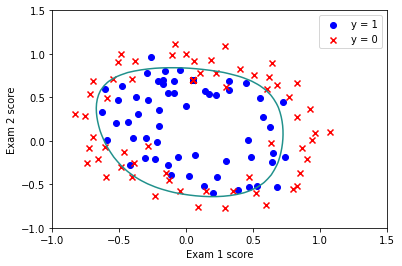

In [15]:
# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
plt.scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='r')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['y = 1', 'y = 0'])

# # Plotting decision boundary
num_points = 50
x_vals = np.linspace(-1, 1.5, num_points)
y_vals= np.linspace(-1, 1.5, num_points)
contour = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        contour[i,j] = np.dot(plot_decision_boundary(x_vals[i], y_vals[j]), theta)
  
plt.contour(x_vals,y_vals,contour.T, 0)

plt.show()

In [16]:
print("Theta final: ")
print(theta)


Theta final: 
[[ 0.88171557]
 [ 0.32544568]
 [ 0.74698044]
 [-1.36576901]
 [-0.49382491]
 [-0.87232047]
 [ 0.00879906]
 [-0.2141623 ]
 [-0.22116381]
 [-0.16481237]
 [-0.99927883]
 [-0.04341251]
 [-0.39081068]
 [-0.13822931]
 [-0.81047302]
 [-0.20578211]
 [-0.13059486]
 [-0.05015101]
 [-0.16800817]
 [-0.16538409]
 [-0.3971376 ]
 [-0.72188668]
 [ 0.00308987]
 [-0.19075397]
 [ 0.00146287]
 [-0.20823083]
 [-0.06622145]
 [-0.69676129]]


In [17]:
print("Final cost", J_hist[-1])

Final cost 0.5800346290563771
